# Lab Assignment 1: Exploring Table Data


## 1. Business Understanding
The thyroid is a gland in the human body that is responsible for, among other things, governing how fast calories are burned and regulating heart rate. It accomplishes this by producing a hormone called thyroid hormone. Various thyroid diseases may cause the thyroid to produce either too much thyroid hormone (hyperthyroidism) or not enough hormone (hypothyroidism), which may result in feeling restless or cause weight fluctuations. Women are more susceptible than men to thyroid diseases.

While the symptoms of hyperthyroidism and hypothyroidism are not particularly severe, if left untreated, they may evolve into rare but potentially fatal conditions. Hyperthyroidism and hypothyroidism can usually be diagnosed through blood tests. The blood tests used to diagnose thyroid conditions include:

- Thyroid-stimulating hormone (TSH), a chemical released by the pituary gland that stimulates the thyroid to produce thyroid hormone
- Triiodothyronine (T3), a hormone produced directly by the thyroid
- Thyroxine, the primary hormone produced by the thyroid, which comes in two forms (free T4 and bound T4) and may be measured using different blood tests including:
  - Total T4 (TT4), which measures both free T4 and bound T4
  - T4 uptake (T4U), which measures how much radioactive iodine is taken up by the thyroid
  - Free thyroxine index (FTI), another measure of free thyroxine
- Thyroxine-binding globulin (TBG), a protein that most of the protein-bound T3 and T4 in the blood bind to

The UCI Thyroid Disease Data Set contains results from the above blood tests as well as other true/false queries about current patient condition, symptoms, and medication. Data for thousands of patients was collected. A total of 30 features along with a classification are provided for each patient. A total of 9 classifications of thyroid condition are considered.

Multiple datasets are provided via the UCI Repository. Two datasets were chosen for this project: a dataset focusing on classifying hyperthyroidism and a dataset focusing on classifying hypothyroidism. The same 2800 patients are considered in both datasets, and the classification assigned to the patient is dependent upon the dataset being considered. For example, a patient with hyperthyroidism would appear as "negative" in the hypothyroidism dataset, but appear as "hypothyroid" in the hyperthyroidism dataset. The same features are provided in both datasets.

The goal is to use blood test results and patient history questions to rapidly diagnose hyperthyroidism and hypothyroidsm. While an automated diagnosis system will never replace a trained doctor, it may be a valuable tool in a doctor's belt to aid the doctor in quickly arriving at the correct diagnosis. Diagnosing hyperthyroidsm and hypothyroidism may not always be straightforward due to the common nature of the symptoms; often a combination of the patient history as well as the previously-discussed blood tests. Saving any amount of time in diagnosing a patient with a thyroid condition provides the patient with additional time to seek proper treatment before a more serious condition develops.

In [1]:
## importing the required packages
import pandas as pd
import numpy as np
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data understanding

### 2.1. Data Quality and Cleaning

- Two datasets are used in this study

    - One dataset represents the Hyperthyroidism and the other is Hypothyroidism. both datasets have the same ID columns, which represents the same data sample at 2,800 instances each. 

    - We will then append these two datasets, forming a new one.
After this process, we need to allocate new names for the columns (ID and class) and eliminate their 
respective old names.

- Part of the data wrangling process it to correctly use data type for each variable. This dataset will be modified so that it contains categorical, continious and orginal variables

- We will also re-label the elements in the column class, and use their maximum categorical number

- We will use the replace numpy library to replace those '?' elements and eventually use use the 'nan' function for null data

- The prediction task will be driven by the 'class' column, which it will eventually be modified into 3 different element as 0,1, and 2, representing normal, hypothyroidism and hyperthyroidism condition respectively.


In [2]:
# appending the two dataframes
df_hypo = pd.read_csv(r'all_hypo.csv') 
df_hyper = pd.read_csv(r'all_hyper.csv') 
df = df_hypo.append(df_hyper)

#### 2.1.1. Merging Datasets 
In order to avoid confusion, the ID and class column from both datasets will be denoted differently.

In [3]:
# In this code, we renamed the columns of ID and class from the df_hper dataset to Hyper_ID and Hyper_class
hyper_class = df_hyper [['ID' , 'class']]
hyper_class.columns = ['Hyper_ID' , 'Hyper_class']
hyper_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
Hyper_ID       2800 non-null int64
Hyper_class    2800 non-null object
dtypes: int64(1), object(1)
memory usage: 43.9+ KB


In [4]:
# In this code, we will add the new created columns Hyper_ID and and Hyper_class to the df dataset
df = pd.merge(df_hypo, hyper_class, left_on='ID', right_on='Hyper_ID', how='right')

In [5]:
# Here, we want to identify the data types of each variable
df_hypo.info()
#2800 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 31 columns):
Age                   2800 non-null object
Sex                   2800 non-null object
on_thyroxine          2800 non-null object
query_on_thyroxine    2800 non-null object
on_antithyroid_med    2800 non-null object
sick                  2800 non-null object
pregnant              2800 non-null object
surgery               2800 non-null object
I131_treatment        2800 non-null object
query_hypothyroid     2800 non-null object
query_hyperthyroid    2800 non-null object
lithium               2800 non-null object
goitre                2800 non-null object
tumor                 2800 non-null object
hypopituitary         2800 non-null object
psych                 2800 non-null object
TSH_measured          2800 non-null object
TSH                   2800 non-null object
T3_measured           2800 non-null object
T3                    2800 non-null object
TT4_measured          2800 non-nu

In [6]:
# Since we now have the Hyper_class column, let's have the other class named as Hypo_class
# Now, our intention is to remove the duplicated columns. In this case, class and Hyper_ID are removed
# from the dataset

df['Hypo_class'] = df['class']

for col in ['Hyper_ID' , 'class']:
    if col in df:
        del df[col]
df.head()
# 5 rows and 32 columns

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_med,sick,pregnant,surgery,I131_treatment,query_hypothyroid,...,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,ID,Hyper_class,Hypo_class
0,41,F,f,f,f,f,f,f,f,f,...,t,1.14,t,109,f,?,SVHC,3733,negative.,negative.
1,23,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,other,1442,negative.,negative.
2,46,M,f,f,f,f,f,f,f,f,...,t,0.91,t,120,f,?,other,2965,negative.,negative.
3,70,F,t,f,f,f,f,f,f,f,...,f,?,f,?,f,?,other,806,negative.,negative.
4,70,F,f,f,f,f,f,f,f,f,...,t,0.87,t,70,f,?,SVI,2807,negative.,negative.


In [7]:
# Here we allocate a new name to our dataset
df1 = df.copy()

In [8]:
# The intention of this code is to re-label our Hyper_class and Hypo_class columns numerically

labels = ['hypothyroid.', 'primary hypothyroid.', 'compensated hypothyroid.' 
          ,'secondary hypothyroid.', 'hyperthyroid.', 'T3 toxic.', 'goitre.', 'secondary toxic.','negative.']
classes = [2,3,4,5,6,7,8,9,1]
df1 = df1.replace(labels , classes)


As we can see in the previous code, the element 'negativate' is associated to normal thyroidism conditions. Therefore, we will assume 1 is 'negative' or A.K.A 'normal'. 

In [9]:
# Then, here we allocate the maximum number from the comparison of Hypo_class and Hyper_class
# Essencially, we are selecting the larger number from these two columns.
df1['class'] = df1[['Hypo_class' , 'Hyper_class']].apply(np.max , axis=1)

In [10]:
df1.columns.values

array(['Age', 'Sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_med', 'sick', 'pregnant', 'surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid',
       'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured',
       'TBG', 'referral_source', 'ID', 'Hyper_class', 'Hypo_class',
       'class'], dtype=object)

In [11]:
# Here, the 'Hyper' and 'Hypo' class columns are removed since are not longer needed.
for col in ['Hyper_class' , 'Hypo_class']:
    if col in df1:
        del df1[col]

In [12]:
#We also decided to remove the measurement columns from df dataset
del_cols = ['query_hypothyroid', 'query_hyperthyroid', 'TSH_measured' , 'T3_measured' , 'TT4_measured' , 'T4U_measured' ,\
            'FTI_measured' ,  'TBG_measured' , 'referral_source']
for col in del_cols:
    if col in df1:
        del df1[col]

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2799
Data columns (total 22 columns):
Age                   2800 non-null object
Sex                   2800 non-null object
on_thyroxine          2800 non-null object
query_on_thyroxine    2800 non-null object
on_antithyroid_med    2800 non-null object
sick                  2800 non-null object
pregnant              2800 non-null object
surgery               2800 non-null object
I131_treatment        2800 non-null object
lithium               2800 non-null object
goitre                2800 non-null object
tumor                 2800 non-null object
hypopituitary         2800 non-null object
psych                 2800 non-null object
TSH                   2800 non-null object
T3                    2800 non-null object
TT4                   2800 non-null object
T4U                   2800 non-null object
FTI                   2800 non-null object
TBG                   2800 non-null object
ID                    2800 non-nu

In [14]:
## In order for Python the compute numerical values
# it was necessary to replace '?' with -1 because 
# -1 is out of range for all numeric variable (blood tests are positive)

df1 = df1.replace(to_replace='?' , value=-1)

# we change true false to binary
df1 = df1.replace(to_replace='f' , value=0)
df1 = df1.replace(to_replace='t' , value=1)
continuous = ['TSH' ,'T3' , 'TT4' , 'T4U' , 'FTI' , 'TBG']
ordinal = ['Age']
category = ['Sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_med', 'sick', 'pregnant', 'surgery',
       'I131_treatment', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
       'TSH',  'T3',  'TT4', 'T4U',  'FTI',  'TBG' , 'ID', 'class']
df1[continuous] = df1[continuous].astype(np.float64)
df1[ordinal] = df1[ordinal].astype(np.int64)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2799
Data columns (total 22 columns):
Age                   2800 non-null int64
Sex                   2800 non-null object
on_thyroxine          2800 non-null int64
query_on_thyroxine    2800 non-null int64
on_antithyroid_med    2800 non-null int64
sick                  2800 non-null int64
pregnant              2800 non-null int64
surgery               2800 non-null int64
I131_treatment        2800 non-null int64
lithium               2800 non-null int64
goitre                2800 non-null int64
tumor                 2800 non-null int64
hypopituitary         2800 non-null int64
psych                 2800 non-null int64
TSH                   2800 non-null float64
T3                    2800 non-null float64
TT4                   2800 non-null float64
T4U                   2800 non-null float64
FTI                   2800 non-null float64
TBG                   2800 non-null float64
ID                    2800 non-null int6

In [15]:
# In this code, 1 which represents 'normal' indiduals, which the largest group of individuals.
# The rest, are individuals with conditions
print(len(df1[df1['class'] == 1]))
print(len(df1[df1['class'] == 2]))
print(len(df1[df1['class'] == 3]))
print(len(df1[df1['class'] == 4]))
print(len(df1[df1['class'] == 5]))
print(len(df1[df1['class'] == 6]))
print(len(df1[df1['class'] == 7]))
print(len(df1[df1['class'] == 8]))
print(len(df1[df1['class'] == 9]))

2503
0
64
154
2
62
8
7
0


In [16]:
#the -1 are now replaced with nan values, so that the pandas panda frame understand them as non applicable values
df1 = df1.replace(to_replace = -1 , value = np.nan)

In [17]:
# In this describe method, it shows that the max values of Age is 455. This is certainly an outlier in the data

df1.describe()

,Age,on_thyroxine,query_on_thyroxine,on_antithyroid_med,sick,pregnant,surgery,I131_treatment,lithium,goitre,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,ID,class
count,2799.00000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2800.000000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000,0.0,2800.000000,2800.000000
mean,51.84423,0.117857,0.014286,0.012143,0.039286,0.014643,0.013929,0.017143,0.005000,0.008929,...,0.000357,0.048214,4.672150,2.024966,109.072401,0.997912,110.787984,NaN,1895.603214,1.358929
std,20.46116,0.322496,0.118687,0.109543,0.194309,0.120140,0.117215,0.129827,0.070546,0.094085,...,0.018898,0.214257,21.449453,0.824600,35.392443,0.194390,32.883986,NaN,1091.130220,1.117319
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN,1.000000,1.000000
25%,36.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.440000,1.600000,88.000000,0.880000,93.000000,NaN,955.750000,1.000000
50%,54.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN,1913.000000,1.000000
75%,67.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.600000,2.400000,125.000000,1.080000,124.000000,NaN,2837.500000,1.000000
max,455.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN,3772.000000,8.000000


#### 2.1.2. Missing Data:
Using the matrix chart from the missingno library, we can observe the distribution of null values, where the TBG 
column shows no values. Other columns such as T3 and TSH are also lacking of values in the last portion of the data.

 TBG contains only NAN, so we should remove this column from our dataset.
 
In addition to the heatmap matrix, there is a bar on the right side of this diagram. This is a line plot for each row's data completeness. In this dataset, all rows have 15 - 21 valid values.

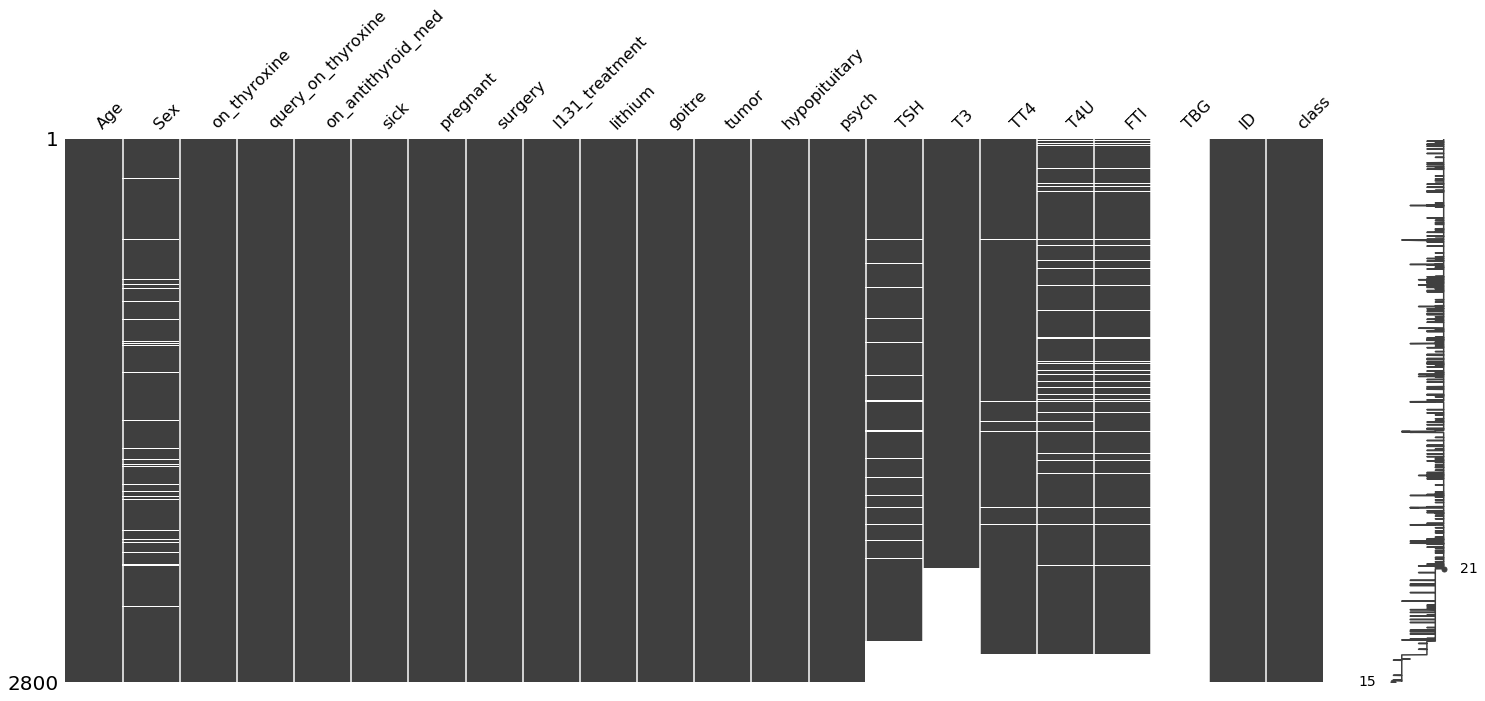

In [18]:
import missingno as mn

mn.matrix(df1.sort_values(by=['T3','TSH','T4U','FTI']))

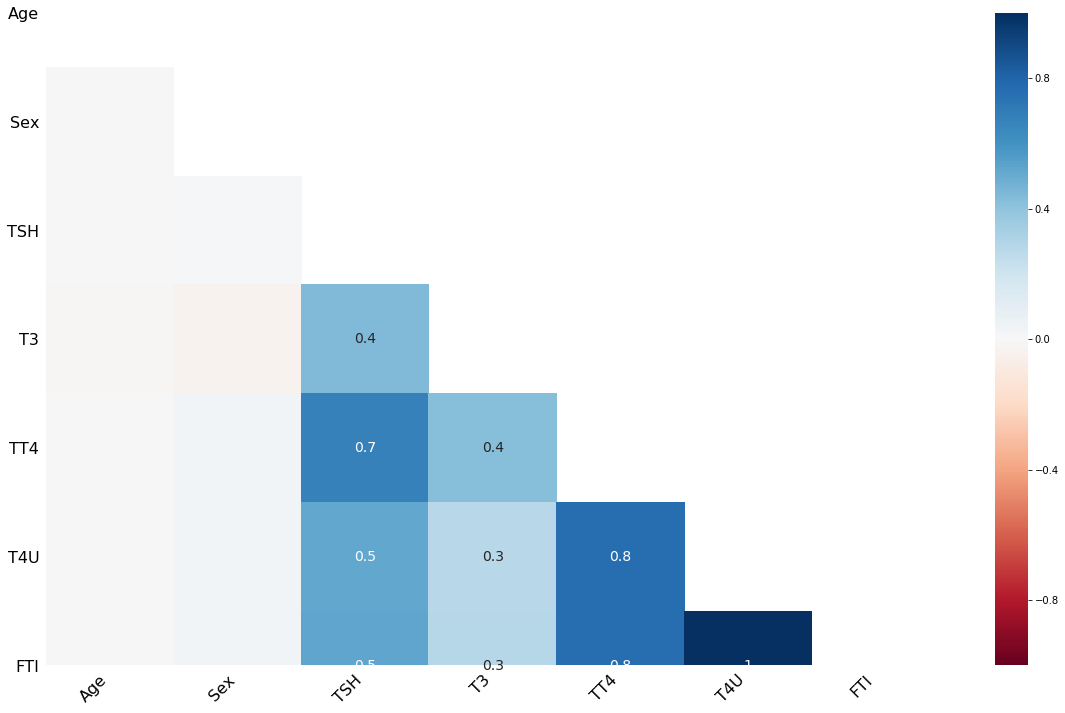

In [19]:
mn.heatmap(df1.sort_values(by=['T3','TSH','T4U','FTI']))

Also, missingno.heatmap visualizes the correlation matrix about the locations of missing values in columns.

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another: As we can see, the variables T4U and T3, as well as FTI and T3 are the lowest correlated with 0.3 units.

On the contrary, the highest values are found with the variables of FTI and T4U at 1.

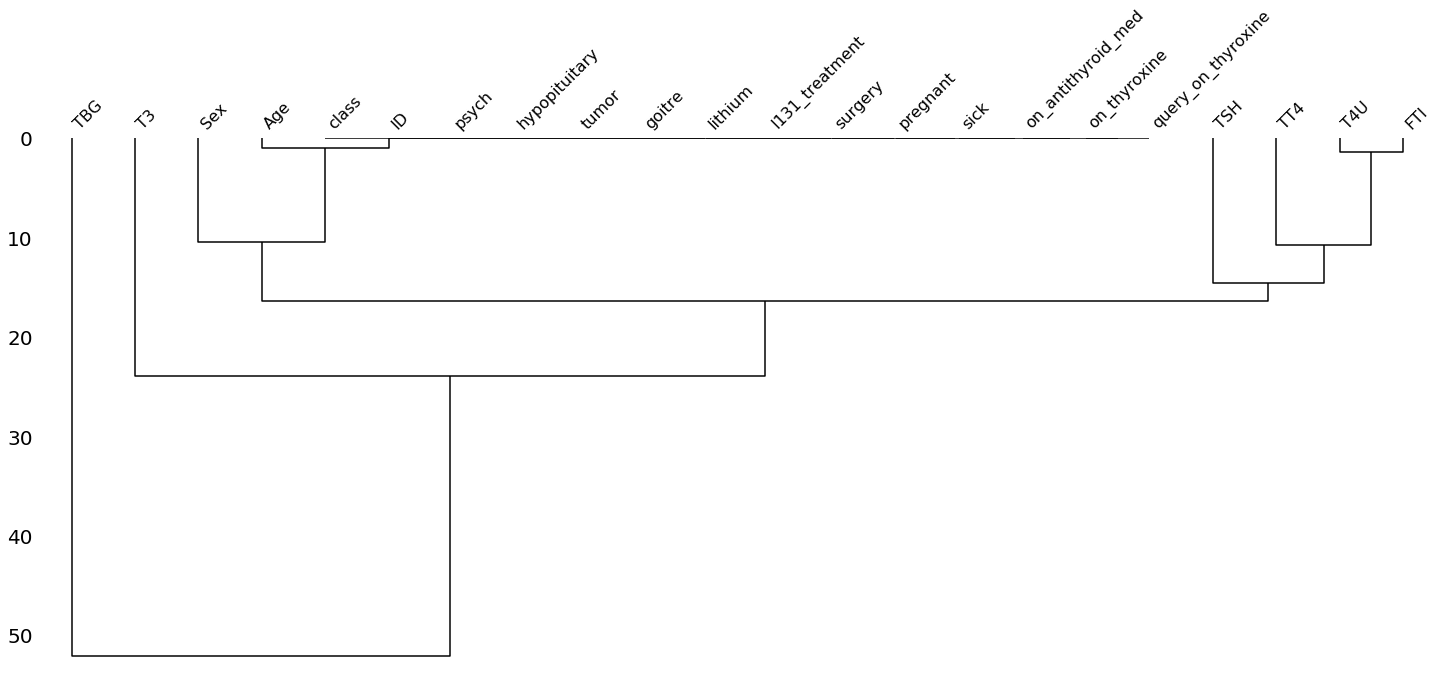

In [20]:
mn.dendrogram(df1.sort_values(by=['T3','TSH','T4U','FTI']))

And finally, The dendrogram allows us to more fully correlate variable completion, revealing trends that are visible when two or more variables are compared against each other.

The theory behind the dendrogram (a topic that have not been covered in class yet) uses hierarchical clustering algorithm to form variables against one another by their binary distance. At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. 

The closest total distance that we can see in this diagram are T4U and FTI, which resembles with the analysis of
the heatmap matrix.


In [21]:
# Now, we will remove the TBG column
for col in ['TBG']:
    if col in df1:
        del df1[col]

In [22]:
# The Sex and Age columns with null value are now removed because applying the impute technique can cause
# arbitrary estimation. The new shape is 21 columns and 2689 rows
df1_reduced = df1.dropna(subset=['Sex' , 'Age'])
print(df1_reduced.shape)

(2689, 21)


#### 2.1.3. Data Imputation and Removal of Additional Missing Data

In [23]:
# in this code, we will only obtain values that are not null in the T3 and TSH columns 
# and assign them to a new dataset
df2 = df1_reduced.copy()
df2 = df2[df2['T3'].notna()]
df2 = df2[df2['TSH'].notna()]
df2.describe()

,Age,on_thyroxine,query_on_thyroxine,on_antithyroid_med,sick,pregnant,surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,ID,class
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2050.000000,1948.000000,1950.000000,2054.000000,2054.000000
mean,52.896300,0.093476,0.009250,0.013632,0.044791,0.015579,0.014119,0.016553,0.005355,0.007303,0.022882,0.000487,0.064265,4.428113,2.011052,108.292878,0.998657,109.991949,1803.587147,1.383155
std,20.832794,0.291169,0.095756,0.115986,0.206894,0.123871,0.118009,0.127621,0.073002,0.085165,0.149564,0.022065,0.245284,18.209322,0.819357,35.371017,0.198979,32.363826,1043.619514,1.152616
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.050000,2.000000,0.310000,2.000000,2.000000,1.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.482500,1.600000,88.000000,0.880000,93.000000,936.250000,1.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,2.000000,103.000000,0.980000,107.000000,1788.500000,1.000000
75%,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,2.300000,124.000000,1.090000,123.000000,2642.250000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,468.000000,10.600000,430.000000,2.120000,395.000000,3772.000000,8.000000


In [24]:
# Now, let's count nulls values that currently exist in our dataset in the TT4, FTI and T4U columns
print(len(df2[df2['TT4'].isna()])) 
print(len(df2[df2['FTI'].isna()]))
print(len(df2[df2['T4U'].isna()]))

4
104
106


In [25]:
# Therefore, we decide to impute the 104 qne 106 elements that are null in FTI and T4U respectively
df2 = df2[df2['FTI'].notna()]
df2 = df2[df2['T4U'].notna()]

In [26]:
# Now we are down from 2800 entries to 1948
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 2799
Data columns (total 21 columns):
Age                   1948 non-null float64
Sex                   1948 non-null object
on_thyroxine          1948 non-null int64
query_on_thyroxine    1948 non-null int64
on_antithyroid_med    1948 non-null int64
sick                  1948 non-null int64
pregnant              1948 non-null int64
surgery               1948 non-null int64
I131_treatment        1948 non-null int64
lithium               1948 non-null int64
goitre                1948 non-null int64
tumor                 1948 non-null int64
hypopituitary         1948 non-null int64
psych                 1948 non-null int64
TSH                   1948 non-null float64
T3                    1948 non-null float64
TT4                   1947 non-null float64
T4U                   1948 non-null float64
FTI                   1948 non-null float64
ID                    1948 non-null int64
class                 1948 non-null int6

In [27]:
# In this code, we will group by Age, Sex, pregnant and on_thyroxine variables, and create
# a function where we will fill the null data with the mean, and them transform it.
df_grouped= df2.groupby(by=['Age', 'Sex','pregnant' , 'on_thyroxine' ])
# # create new dataframe that fills groups with the #MEAN median of that group
func = lambda grp: grp.fillna(grp.mean())
df_imputed = df_grouped.transform(func)

In [28]:
#In this code, we now fill the data with the mean 
col_deleted = list(set(df2.columns) - set(df_imputed.columns)) # in case the median operation deleted columns
col_deleted

['on_thyroxine', 'pregnant', 'Sex', 'Age']

In [29]:
# then assign df2 to df_impute for the col_deleted column
df_imputed[col_deleted] = df2[col_deleted]

In [30]:
df_imputed.describe()

,query_on_thyroxine,on_antithyroid_med,sick,surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,ID,class,on_thyroxine,pregnant,Age
count,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000
mean,0.009240,0.013347,0.046201,0.012834,0.016427,0.005647,0.007700,0.023101,0.000513,0.066222,4.374620,2.014784,108.750873,0.998657,110.002721,1793.455852,1.377823,0.093943,0.016427,53.225873
std,0.095706,0.114785,0.209975,0.112585,0.127144,0.074952,0.087435,0.150262,0.022657,0.248733,18.423106,0.824531,35.440577,0.198979,32.378375,1040.260085,1.153348,0.291824,0.127144,20.881236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.050000,2.000000,0.310000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.450000,1.600000,88.000000,0.880000,93.000000,931.500000,1.000000,0.000000,0.000000,37.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,2.000000,104.000000,0.980000,107.000000,1768.500000,1.000000,0.000000,0.000000,55.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,2.400000,124.000000,1.090000,123.000000,2625.250000,1.000000,0.000000,0.000000,69.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,468.000000,10.600000,430.000000,2.120000,395.000000,3772.000000,8.000000,1.000000,1.000000,455.000000


In [31]:
### Here, we can indentify the values that are imputed - 324 for the TT4 variable
print(df2[df2['TT4'].isna()]['TT4'])

print(df_imputed.loc[324]['TT4'])

324   NaN
Name: TT4, dtype: float64
90.1


In [32]:
df2 = df_imputed.copy()

### 2.2. Data Description

In [33]:
df_copy = df2.copy()
data_des = pd.DataFrame()
data_des['Features'] = df_copy.columns
data_des = data_des[data_des.Features != 'on_thyroxine']

data_des['Description'] = ['Is the patient on thyroxine medication?', 'Is the patient on antithyroid medication?', \
                           'Is the patient currently sick?', 'Has the patient had any surgeries?', \
                           'Has the patient received Iodine-131 treatment?', 'Is the patient on lithium medication?', \
                           'Is the patient exhibiting goitre?', 'Does the patient have a tumor?', \
                           'Does the patient have hypopituitarism?', 'Does the patient have any psychiatric disorders?', \
                           "Patient's TSH level", "Patient's T3 level", "Patient's TT4 level", "Patient's T4U level", \
                           "Patient's FTI level", 'Patient ID number', 'Diagnosis', 'Age', 'Sex', 'Is the patient pregnant?']

data_des['Scales'] = ['nominal']*10 + ['ratio']*5 + ['nominal']*2 + ['ratio'] + ['nominal']*2

data_des['Type'] = ['discrete']*10 + ['continuous']*5 + ['discrete'] + ['categorical'] + ['continuous'] + ['discrete']*2

data_des['Range'] = ['0:false,  1:true']*10 + ['0.0–0.53'] + ['0.0005–0.18'] + ['0.002–0.6'] + ['0.017–0.233'] + \
                    ['0.002–0.642'] + ['1 - 2800'] + ['1-9'] + ['0.01-0.97'] + ['0:male, 1:female'] + ['0:false, 1:true']

data_des

,Features,Description,Scales,Type,Range
0,query_on_thyroxine,Is the patient on thyroxine medication?,nominal,discrete,"0:false, 1:true"
1,on_antithyroid_med,Is the patient on antithyroid medication?,nominal,discrete,"0:false, 1:true"
2,sick,Is the patient currently sick?,nominal,discrete,"0:false, 1:true"
3,surgery,Has the patient had any surgeries?,nominal,discrete,"0:false, 1:true"
4,I131_treatment,Has the patient received Iodine-131 treatment?,nominal,discrete,"0:false, 1:true"
5,lithium,Is the patient on lithium medication?,nominal,discrete,"0:false, 1:true"
6,goitre,Is the patient exhibiting goitre?,nominal,discrete,"0:false, 1:true"
7,tumor,Does the patient have a tumor?,nominal,discrete,"0:false, 1:true"
8,hypopituitary,Does the patient have hypopituitarism?,nominal,discrete,"0:false, 1:true"
9,psych,Does the patient have any psychiatric disorders?,nominal,discrete,"0:false, 1:true"


## 3. Data Visualization and Further Cleaning

### 3.1. Correlation Matrix
Now a correlation matrix is used to investigate the correlation between different features.

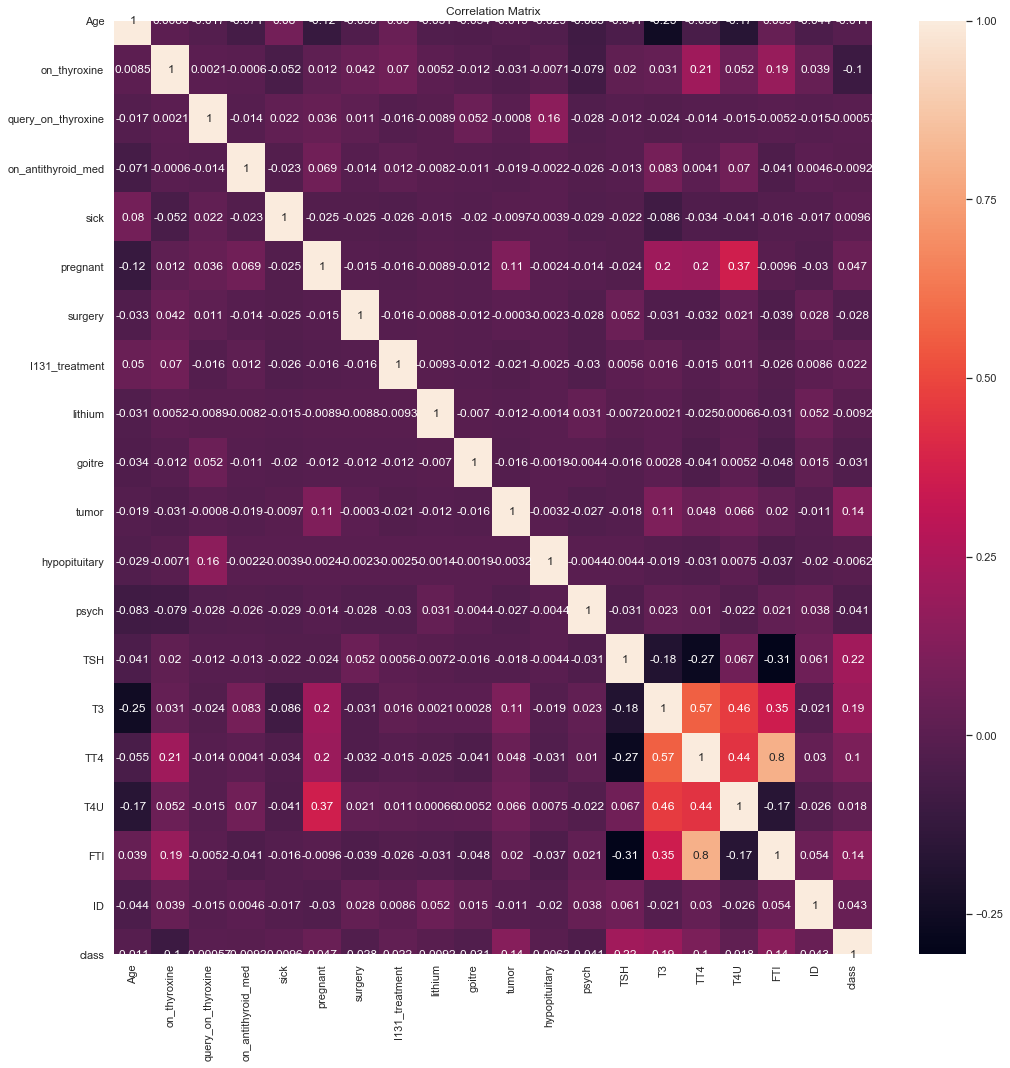

In [34]:
import seaborn as sns
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1_reduced.corr(), cmap=cmap, annot=True)
plt.title('Correlation Matrix')

f.tight_layout()

There is a high correlation in the Correlation Matrix showing on_thyroxine correlating TT4 and FTI at 0.21 and 0.19 respectively. There is also correlation on pregnant with T4U with a correlation values of 0.37 The column TSH is characterized to have many null values. It does not show any correlations Also, the T3 column does not show correlation. It will be necessary to remove null values from it. And finally, the columns TT4, T4U and FTI will be imputed.

### 3.2. Outlier Indentification and Removal
Next, box plots will be used to identify outliers in the feature sets.

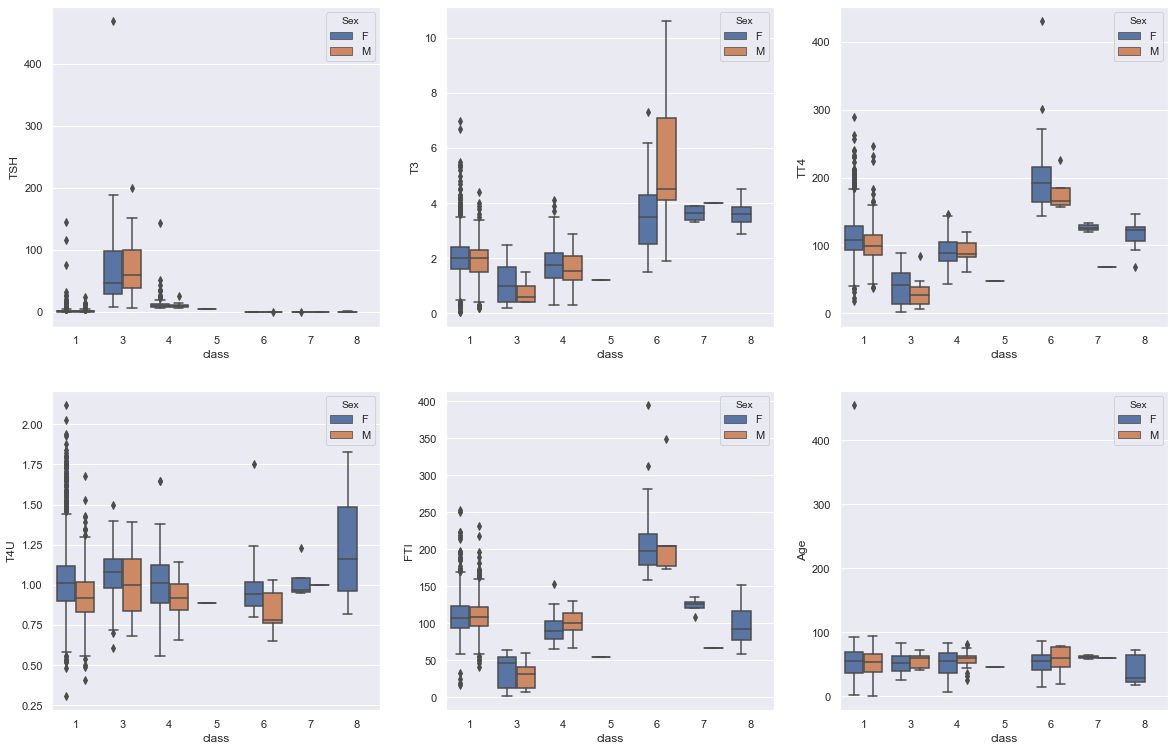

In [35]:
# We will now see outliers from the Boxplot visualization
# 
plt.subplots(figsize=(20,20))
#funcs_to_plot = [sns.boxplot, sns.violinplot, sns.swarmplot]
y_type = ['TSH', 'T3', 'TT4', 'T4U', 'FTI' , 'Age']
for i, y in enumerate(y_type):
   args = { 'x':'class' , 'y':y_type[i], 'hue':'Sex', 'data':df2 }
   plt.subplot(3,3,i+1)
   sns.boxplot(**args)
plt.show()

A box plot shows the distribution of quantitative data.It facilitates comparisons between variables. The box shows the quartiles (25, 50, and 75) of the dataset while the whiskers extend to show the rest of the distribution. 
The points that are extended in the higher section of the y-axis, are determined to be “outliers”. 
In this way, we can see outliers for some of the blood test samples such as TSH, TT4, and FTI, as well as the Age.
In this charts, we find for instances TSH levels of 400 unit at class 3 for females.
The normal range for TSH is between 0.5 mU/l and 5.0 mU/l.

According to the veryWellHealth site (https://www.verywellhealth.com/understanding-thyroid-blood-tests-low-or-high-tsh-3233198)

it says: 'A high TSH suggests your thyroid is underactive (hypothyroid) and not doing its job of producing enough thyroid hormone.
A low TSH suggests your thyroid is overactive (hyperthyroid) and producing excess thyroid hormone.'

Also, according to the Webmd website, article: https://www.webmd.com/women/what-is-tsh-test#1

In general, T3 and T4 levels increase in pregnancy and TSH levels decrease. This is seen in class 6 where in T4 and T3 are high, but not so much for TSH.

<img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3354841/bin/IJEM-16-364-g002.jpg" alt="pregnancy" width="600" >

Courtesy of the National Library of Medicine " Indian J Endocrinol Metab. 2010 May-June 16(3): 364-370. Hypothyroidism in pregnancy

In [36]:
#### Removing age 400 and TSH 400 
df2 = df2[df2['Age'] < 100]
df2 = df2[df2['TSH'] < 200]
df2 = df2[df2['TT4'] < 400]
df2 = df2[df2['FTI'] < 300]

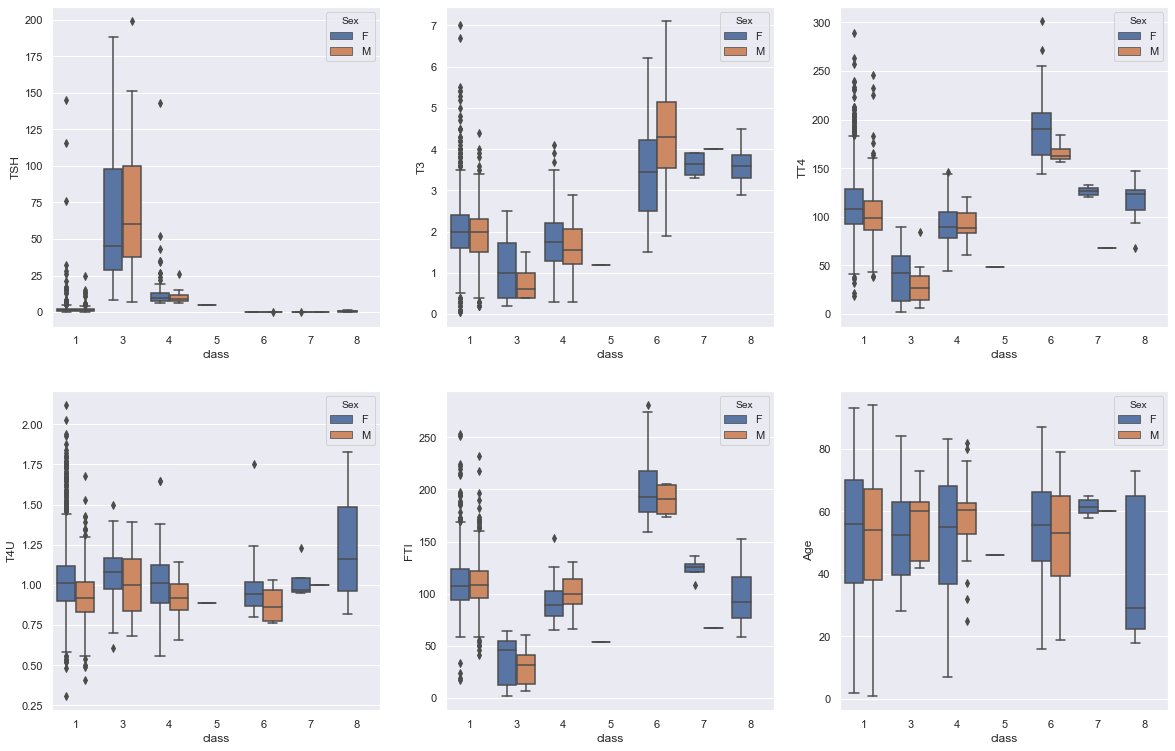

In [37]:
plt.subplots(figsize=(20,20))
plt.title('Outliers Removed')
#funcs_to_plot = [sns.boxplot, sns.violinplot, sns.swarmplot]
y_type = ['TSH', 'T3', 'TT4', 'T4U', 'FTI' , 'Age']
for i, y in enumerate(y_type):
   args = { 'x':'class' , 'y':y_type[i], 'hue':'Sex', 'data':df2 }
   plt.subplot(3,3,i+1)
   sns.boxplot(**args)
plt.show()

In the box plots shown above, the outliers discussed have been removed.

### 3.4. Data Grouping
All of the 9 classes within the data represent subclasses of three main diagnoses:
1. The patient is has no thyroid condition ("normal")
2. Hypothyroidism
3. Hyperthyroidism

Instead of grouping observations into 9 different classes, observations will be grouped into three different classes based on where the patient falls within these three classes.

In [38]:
# We now we wil be grouping the classes into 3 categories of thyroid:
# 1 - normal
# 2 - hypo
# 3 - hyper
# Define a class_labels column

hypo = [2,3,4,5]
hyper = [6,7,8,9,]
none = [1]

df2['class_label'] = 1
df2.loc[df2['class'].isin(hypo),'class_label'] = 2

df2.loc[df2['class'].isin(hyper),'class_label'] = 3

In [39]:
## Adding the age range
df2['age_range'] = pd.cut(df2['Age'],[0,15,25,40,65,1e6],
                                 labels=['child','young' ,'young adult','adult','senior']) # this creates a new variable
df2.age_range.describe()

count      1943
unique        5
top       adult
freq        783
Name: age_range, dtype: object

is_Female    False  True 
class_label              
1              621   1110
2               39    117
3                5     51


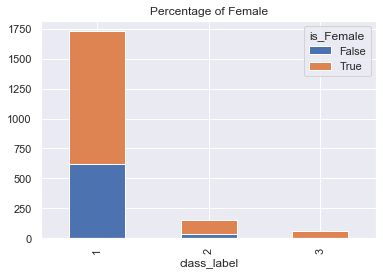

In [40]:
#percentage of male and female in each label
#make a new binary column for sex, calles is_Female 
df2['is_Female'] = 1
df2.loc[df2['Sex'] =='M' , 'is_Female'] = 0
df2=df2.copy()

# the cross tab operator provides an easy way to get these numbers
survival = pd.crosstab([df2['class_label']], # categories to cross tabulate
                       df2.is_Female.astype(bool)) # how to group
print(survival)

survival.plot(kind='bar', stacked=True , title = 'Percentage of Female')
plt.show()

In this chart, we can see that the larger group is under 'nomal' conditions - making females that larger percent of gender representation. In addition, most of the hypo and hyper cases are attributed to females. This analyses reflects the fact that thyroid conditions are more prominent in the female population.

### 3.5. Violin Plot Visualization for Different Features

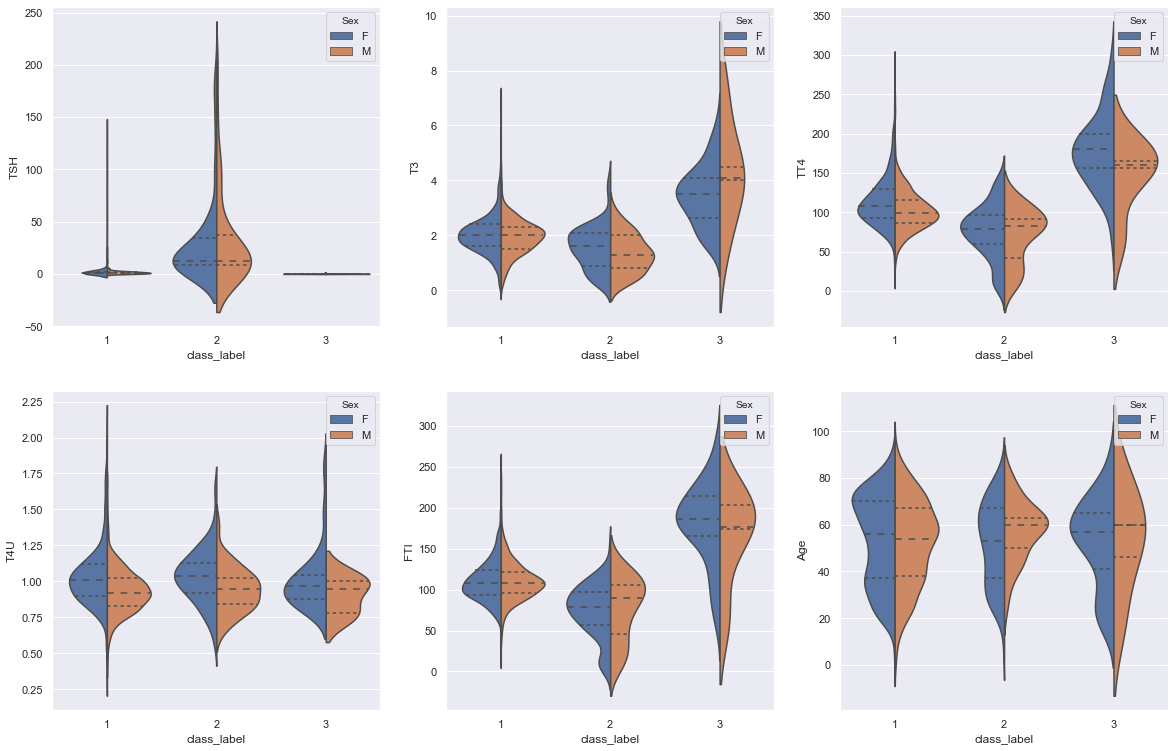

In [41]:
# Now, we will the function sns.violinplot
plt.subplots(figsize=(20,20))

y_type = ['TSH', 'T3', 'TT4', 'T4U', 'FTI' , 'Age']
for i, y in enumerate(y_type):
   args = {'x':'class_label', 'y':y_type[i], 'hue':'Sex', 'data':df2, 'split':True, 'inner':'quart'}
   plt.subplot(3,3,i+1)
   sns.violinplot(**args)
plt.show()

In this visualization, we can indentify a large range of of Hyperthyrodism with the FTI attribute. The blue thicker portion of this chart in class 3, represents the data containing more female data points than males.The same escenario can be seen with the attribute TT4. These two blood test procedures can be better used for Hyperthyrodism rather Hypo. Both peaks at TT4 and FTI tends to be relative higher for females  than in males.

Now, if we look at the TSH blood test, the hyper condition represents narrow ranges for both females and males. This assumption motivates us to believe that there is an inverse relation between TSH with TT4 and FTI at the class 3 element.

Additionally, the distribution in the TSH blood sample shows that the normal and hyper class has minimal range compared to hypo, which is extended from negative units to the hundreds. 

The age distribution in 'normal' individuals for females have two peaks, one between 30-40 and another between 60-80. this peak presents that women in these age groups are prone to thyroid malfunctions. 
Also, negative numbers in the Age attribute are shown because of gussian distribution's random variables. 

Now to better understand the dataset, let's use agen ranges for both female and male

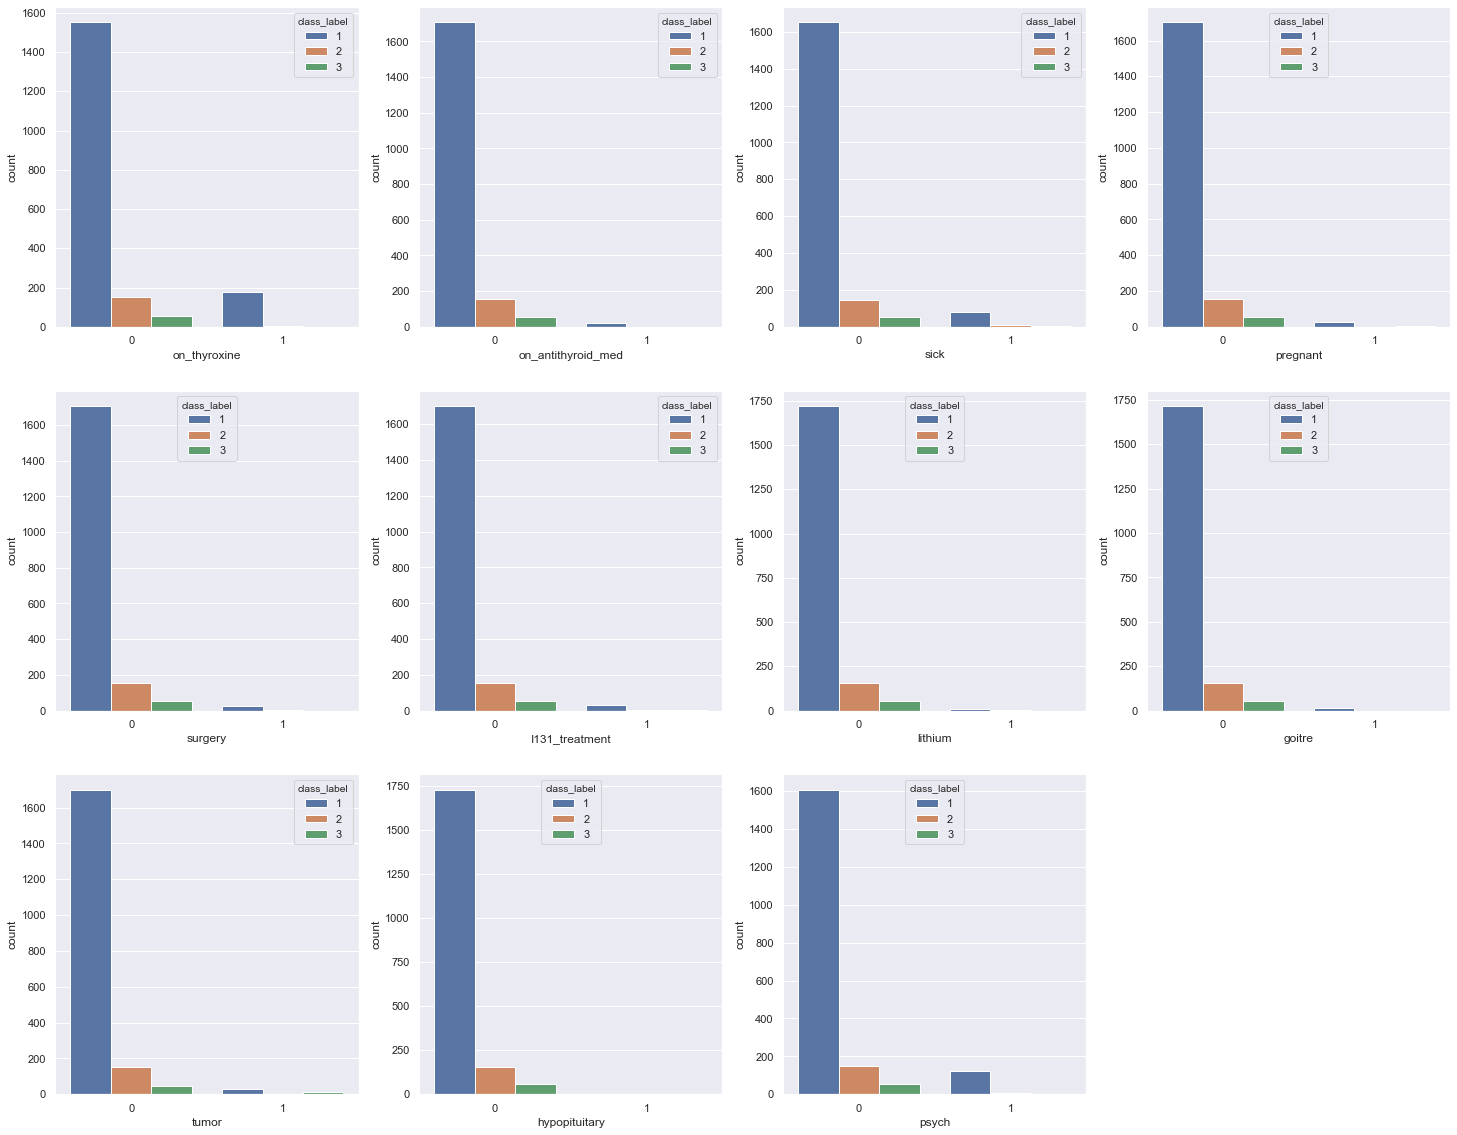

In [42]:
plt.figure(figsize=(25,20))
y_type = ['on_thyroxine', 'on_antithyroid_med', 'sick', 'pregnant', 'surgery',
          'I131_treatment', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',]
for i, y in enumerate(y_type):
   args = {'x':y_type[i], 'hue':'class_label', 'data':df2 }
   plt.subplot(3,4,i+1)
   sns.countplot(**args)
plt.show()

From this visualization, we draw the following conclusions:
- There are more females on anti_thyroid suffering from hypo than males with normal conditions
- There are more females on I131_treatment, lithium, and surgery fighting hypothyroidsm than fighting hyperthyroidsm.
- Nearly none of the male has a hypopituitary condition which is associated with hypo or hyper thyroidism.
- About the same number of females being treated with hypo and hyper are pregnant.

### 3.6. Pairwise Distances 
This method takes either a vector array or a distance matrix, and returns a distance matrix. If the input is a vector array, the distances are computed. If the input is a distances matrix, it is returned instead. To get the paiwise distance matrix a new correlation matrix was generated to understand if there are any significant correlations between available variables and the class_label attribute. 

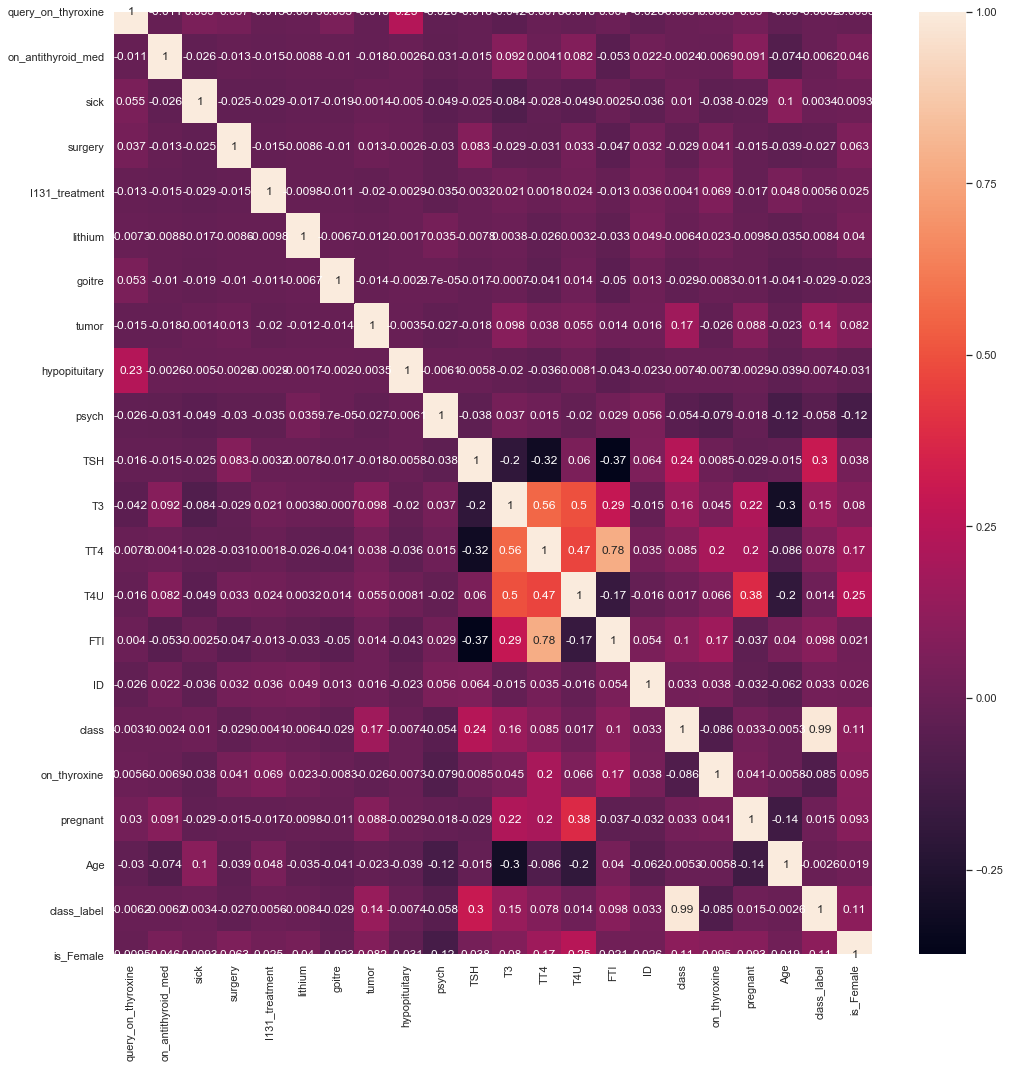

In [43]:
cmap = sns.set() # one of the many styles to plot using

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df2.corr(), cmap=cmap, annot=True)

f.tight_layout()

Here, we can female gender correlation with T4U at 0.25 units. A similar correlation is seen between pregnancy and T4U, TT4, and T3. On the other hand, TSH shows a high negative correlation with FTI. As we can see, age does not show noticeable correlation with class labels, so we will exclude it in our analysis.

In this following analysis, we want to indentify partial classification of features than all features together. For that, we will use the pairwise distances matrix plot. 

#### 3.6.1. First Pairwise Distance Analysis
In the first one, we will use the blood test results,  gender and medications taken by patient, while on the other one we will use the features that describe symptoms. 

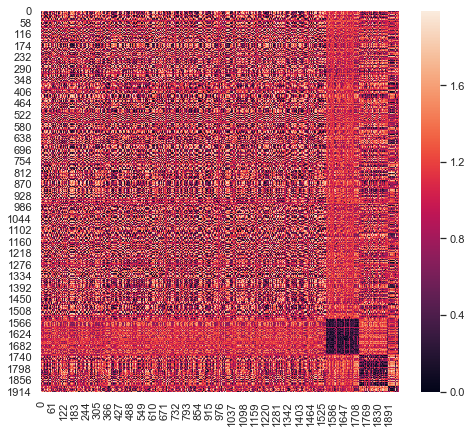

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances

f, ax = plt.subplots(figsize=(8, 7))


std = StandardScaler()

###Medications 
vars_to_use = ['is_Female', 'TSH', 'T3', 'TT4', 'T4U', 'FTI' , 'on_thyroxine' , 'on_antithyroid_med' , 
                'surgery', 'I131_treatment'] # pick vars
df_imputed_copy = df2.copy().sort_values(by=['class_label', 'on_thyroxine' ])

xdata = pairwise_distances(std.fit_transform(df_imputed_copy[vars_to_use].values), metric='correlation')
sns.heatmap(xdata, cmap=cmap, annot=False)

This pairwise distance matrix is sorted based on if the patient is taking thyroxine or anti-thyroid medications. to find the similarity between the instances, only blood tests, gender and medications are used. the first 1700 data in the plot are normal patients. the plot shows:

1. normal people that are not on thyroxine are not similar, which represents the first block.

2. normal people that are on-thyrois are very similar to each other based on lab work results. Which represents the second block.

3. class 2 and class 3 can be distinguished using the used variables in this matrix however being on thyroxine or not being,  does not show any grouping in the plot. 

By looking at previous countplot we can see the number of patients on thyroxine in those group are not noticeable and as a consequence, this may be the reason that the lack of grouping is seeing in the pariwise distance matrix. 

#### 3.6.2. Second Pairwise Distance Analysis
This pairwise distance matrix is plotted by using only the lab work results, symptoms and patients' background.

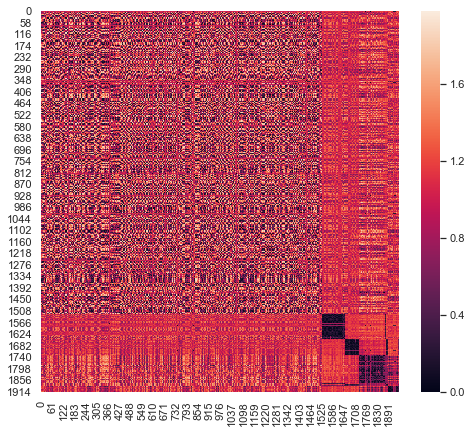

In [45]:
f, ax = plt.subplots(figsize=(8, 7))


#### Symptoms
vars_to_use = [ 'is_Female', 'TSH', 'T3', 'TT4', 'T4U', 'FTI' , 'class_label', 'tumor' ,  
               'sick', 'surgery', 'lithium', 'goitre', 'tumor', 'hypopituitary' ,'psych'] # pick vars
df_imputed_copy = df2.copy().sort_values(by=['class_label',  'sick' ,'psych' ])

xdata = pairwise_distances(std.fit_transform(df_imputed_copy[vars_to_use].values), metric='correlation')
sns.heatmap(xdata, cmap=cmap, annot=False)

Normal people who are sick or have psych symptoms are similar to each other based on lab work results, and their background. However there is some similarity between group 2 and 3 of class_labels, but still there are some instances in class 2 (Hypo) who are more similar to class 3 (Hyper). This shows that the fetures used in this matrix are not efficient enough in classifying group 2 and 3 but their are good in classifying group 1 patients (Normal) that have the condition of sick and psych sympthoms. This analysis showed that to better visualize this dataset, it is better to not to use all the available features and, but rather reducing the dimension of the dataset that yields better results. 

Therefore, in the next segment, we will apply dimensionality reduction for visualization using the t-SNE algorithm. 

## 4. Dimensionality Reduction Using t-SNE
t-Stochastic Neighbor Embedding, or t-SNE, is a nonlinear dimensionality reduction technique that is useful for visualizing high-dimensional datasets. Each data point from the high-dimensional dataset is mapped to a two- or three-dimensional point using probability distributions. A probability distribution is constructed for the high-dimensional data such that points that are similar have a high probability of being selected while points that are dissimilar have a low probability of being selected. Next, the t-SNE algorithm constructs a probability distribution for the data points in the lower dimension map and minimizes the Kullback-Leibler divergence between the two distributions. This produces a lower-dimension mapping of the high-dimensional data where points are plotted near other points with a high similarity, resulting in similar data being clustered.

The t-SNE algorithm was originally developed and published by Laurens van der Maaten and Geoffrey Hinton. Further information can be found in:

- van der Maaten, J. P. and Hinton, G. E. (2008). "Visualizing High-Dimensional Data Using t-SNE." *Journal of Machine Learning Research*, 9(Nov), 2579-2605.

In [46]:
# t-SNE implementation
from sklearn.manifold import TSNE
import sys
# np.set_printoptions(threshold=sys.maxsize)

#features = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
features = ['query_on_thyroxine', 'on_antithyroid_med', 'sick', 'surgery', 'I131_treatment', 'lithium', 'goitre', 'tumor',\
            'hypopituitary', 'psych', 'Age', 'pregnant', 'on_thyroxine', 'is_Female', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
data = df2[features]
tsne = TSNE(n_components=2, perplexity=50, init='pca', verbose=1, random_state=0)
df_tsne = pd.DataFrame(data=tsne.fit_transform(data), columns=['dim_1', 'dim_2'])
df_tsne = df_tsne.set_index(df2.index)
df_tsne['class_label'] = df2.class_label
df_tsne['sex'] = df2.is_Female

print('----------------------------------------')
print(df_tsne.head())
print('----------------------------------------')
print(df_tsne.describe())

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1943 samples in 0.003s...
[t-SNE] Computed neighbors for 1943 samples in 0.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1943
[t-SNE] Computed conditional probabilities for sample 1943 / 1943
[t-SNE] Mean sigma: 7.570215
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.890549
[t-SNE] Error after 1000 iterations: 0.841169
----------------------------------------
       dim_1      dim_2  class_label  sex
0  22.501974 -16.038639            1    1
4 -48.739933   3.654943            1    1
7 -19.352516  21.015646            1    1
8  27.884651  10.351811            1    1
9 -31.396667  18.026833            1    0
----------------------------------------
             dim_1        dim_2  class_label          sex
count  1943.000000  1943.000000  1943.000000  1943.000000
mean     -0.267105     0.478195     1.137931     0.657746
std      30.541500    16.571987     0.420285     0.474586
min    

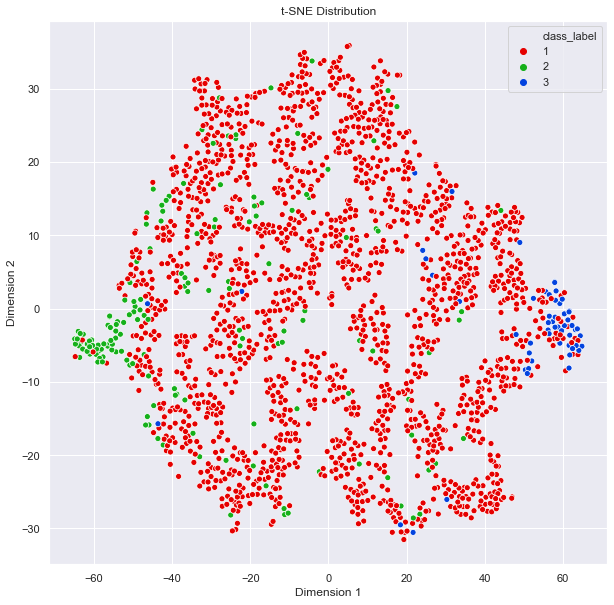

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(df_tsne.dim_1, df_tsne.dim_2, hue=df_tsne.class_label, \
                palette=sns.xkcd_palette(['red', 'green', 'blue']), legend='full', alpha=1.0)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Distribution')
plt.show()

Implemented on the cleaned thyroid disease dataset, the t-SNE algorithm shows that the data points labeled as classes 1 and 2 (hyporthyroid and hyperthyroid) are clustered, meaning that they have a high degree of similarity. There is some clustering that can be seen within the class 0 (normal) data as well. Any new data point acquired that falls within the blue cluster above would likely be classified as "hyperthyroid", but may also be classified as "normal". Any new data point that falls within the green cluster above would likely be classified as "hypothyroid". If a new data point falls outside of the blue and green clusters, it has a very high chance of being classified as "normal".

The thyroid disease dataset contains approximately twice as many females as males (1278 females vs. 665 males) since females have a higher likelihood of having a thyroid condition. To investigate whether the distribution created using the t-SNE algorithm is any different for the males and females within the dataset, the dataset was separated by sex and the t-SNE distributions for each sex were plotted side-by-side.

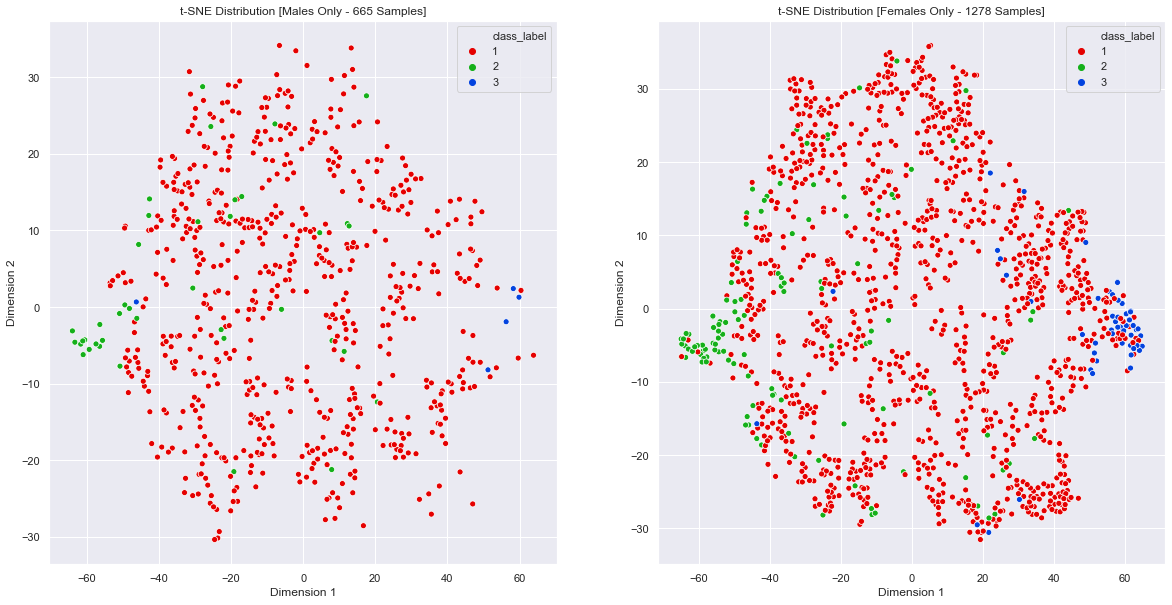

In [48]:
plt.subplots(figsize=(20,10))

plt.subplot(1,2,1)
sns.scatterplot(df_tsne[df_tsne.sex==0].dim_1, df_tsne[df_tsne.sex==0].dim_2, hue=df_tsne[df_tsne.sex==0].class_label, \
                palette=sns.xkcd_palette(['red', 'green', 'blue']), legend='full', alpha=1.0)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Distribution [Males Only - %i Samples]' % df_tsne[df_tsne.sex==0].shape[0])

plt.subplot(1,2,2)
sns.scatterplot(df_tsne[df_tsne.sex==1].dim_1, df_tsne[df_tsne.sex==1].dim_2, hue=df_tsne[df_tsne.sex==1].class_label, \
                palette=sns.xkcd_palette(['red', 'green', 'blue']), legend='full', alpha=1.0)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Distribution [Females Only - %i Samples]' % df_tsne[df_tsne.sex==1].shape[0])

plt.show()

The t-SNE distribution for the female population looks very similar to the t-SNE for the entire dataset plotted above. This is expected, as the majority of the dataset population is female. The same clusters can be seen in both distributions. The t-SNE distribution for the male population is more difficult to identify clusters in; this is most likely a function of the relatively small amount of data.

## 6. References
van der Maaten, J. P. and Hinton, G. E. (2008). "Visualizing High-Dimensional Data Using t-SNE." *Journal of Machine Learning Research*, 9(Nov), 2579-2605.

Shomon, M. (2019). "High and Low TSH Levels: What They Mean." *Verywell Health*, <www.verywellhealth.com>.

"What is a TSH test?" *WebMD*. <www.webmd.com>.

Sahay, R. K. and Sri Nagesh, V. (2012). "Hypothyroidism in pregnancy." *Indian Journal of Endocrinology and Metabolism*, 16(3), 364-370.